# Lab #3

Data exploration is a crucial step in the AI/ML pipeline. Before we dive into complex algorithms, we need to understand the basics of our dataset. This process involves:

- Summarizing the main characteristics of the dataset
- Detecting any anomalies or outliers that may affect model performance
- Unveiling the structure and patterns in the data by visualizing 

We will use these Python librares: pandas for data exploration, matplotlib and seaborn for visualization

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC

## Data Loading

- Here, we load the Iris dataset using Pandas. We use the 'head', 'info', and 'describe' methods to get an initial understanding of the dataset's structure, data types, and some basic statistical details.

In [84]:
# Load the dataset
df = pd.read_csv('data/iris_dataset.csv')

# Initial exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   147 non-null    float64
 2   petal length (cm)  147 non-null    float64
 3   petal width (cm)   148 non-null    float64
 4   target             149 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [85]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [86]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,149.000000,147.000000,147.000000,148.000000,149.000000
mean,5.849664,3.060544,3.744898,1.200000,0.993289
std,0.827208,0.438640,1.779879,0.759341,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.550000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.350000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Data Cleaning and Preprocessing

- Missing values can significantly affect the performance of ML models. We handle them by imputing using the mean of each column. This is a simple strategy, but there are more sophisticated methods available. 

In [87]:
# Handling missing values - Simple Imputation
df.fillna(df.mean(), inplace=True)

# Check if there are any missing values left
print(df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


- Normalization is crucial when features have different scales, as it standardizes the range of independent variables.

In [88]:
# Normalization (if necessary)
scaler = StandardScaler()
df['target'] = np.ceil(df['target']).astype(int)
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('target', axis=1)), columns=df.columns[:-1])
df_scaled['target'] = df['target']

# df = df_scaled # uncomment if you want to use the scaled values
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.912361,1.015491,-1.335373,-1.330302,0
1,-1.155766,-0.139905,-1.335373,-1.330302,0
2,-1.399172,0.322253,-1.392321,-1.330302,0
3,-1.520874,0.091174,-1.278425,-1.330302,0
4,-1.034064,1.246570,-1.335373,-1.330302,0
...,...,...,...,...,...
145,1.034881,-0.139905,0.828652,1.463332,2
146,0.548070,-1.295301,0.714756,0.931211,2
147,0.791475,-0.139905,0.828652,1.064241,2
148,0.426368,0.784412,0.942548,1.463332,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Descriptive Statistical Analysis

- Descriptive statistics provide important insights into the data. Mean and median offer information about the central tendency, while standard deviation tells us about the spread of the data. These metrics are foundational for understanding any dataset.

In [90]:
# Basic statistics
print("Mean:\n", df.mean())
print("Median:\n", df.median())
print("Standard Deviation:\n", df.std())

Mean:
 sepal length (cm)    5.849664
sepal width (cm)     3.060544
petal length (cm)    3.744898
petal width (cm)     1.200000
target               0.993333
dtype: float64
Median:
 sepal length (cm)    5.8
sepal width (cm)     3.0
petal length (cm)    4.3
petal width (cm)     1.3
target               1.0
dtype: float64
Standard Deviation:
 sepal length (cm)    0.824428
sepal width (cm)     0.434202
petal length (cm)    1.761870
petal width (cm)     0.754227
target               0.815098
dtype: float64


## Data Visualization

- Visualization is key to understanding the distribution and relationship between variables. Histograms show the distribution of each feature, box plots highlight outliers, and scatter plots (using pairplot) reveal the relationships between pairs of features, colored by the target variable.

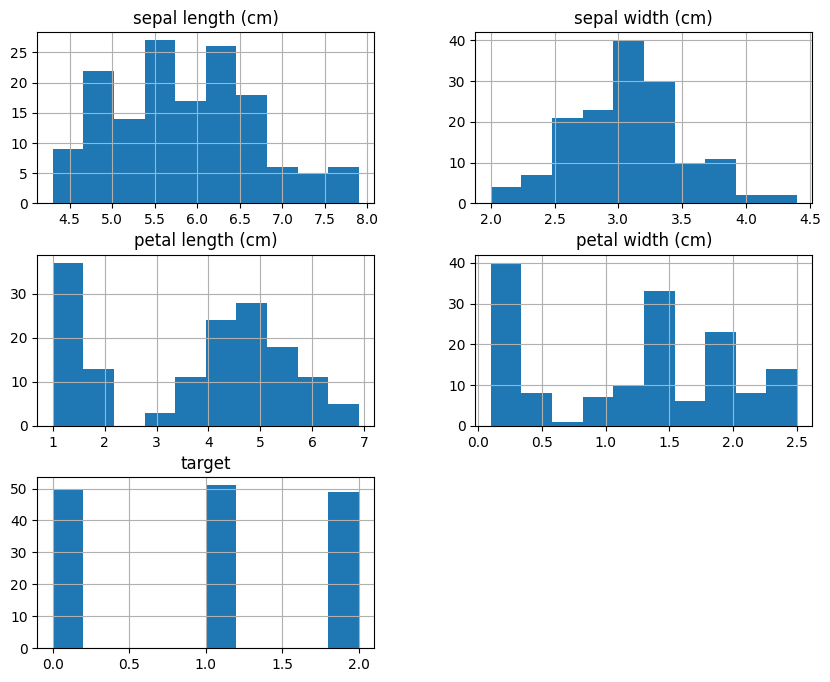

In [91]:
# Histograms for feature distributions
df.hist(figsize=(10, 8))
plt.show()

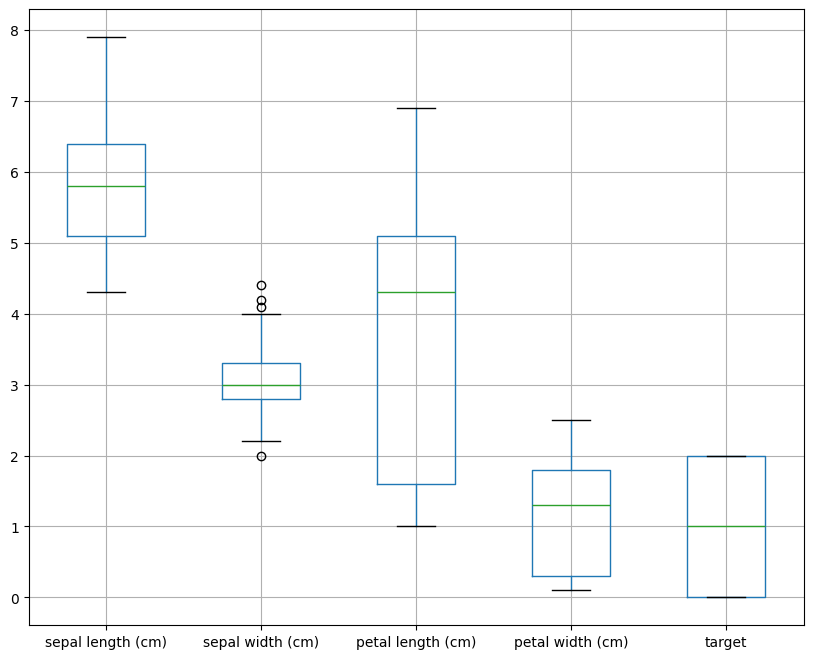

In [92]:
# Box plots to identify outliers
df.boxplot(figsize=(10, 8))
plt.show()

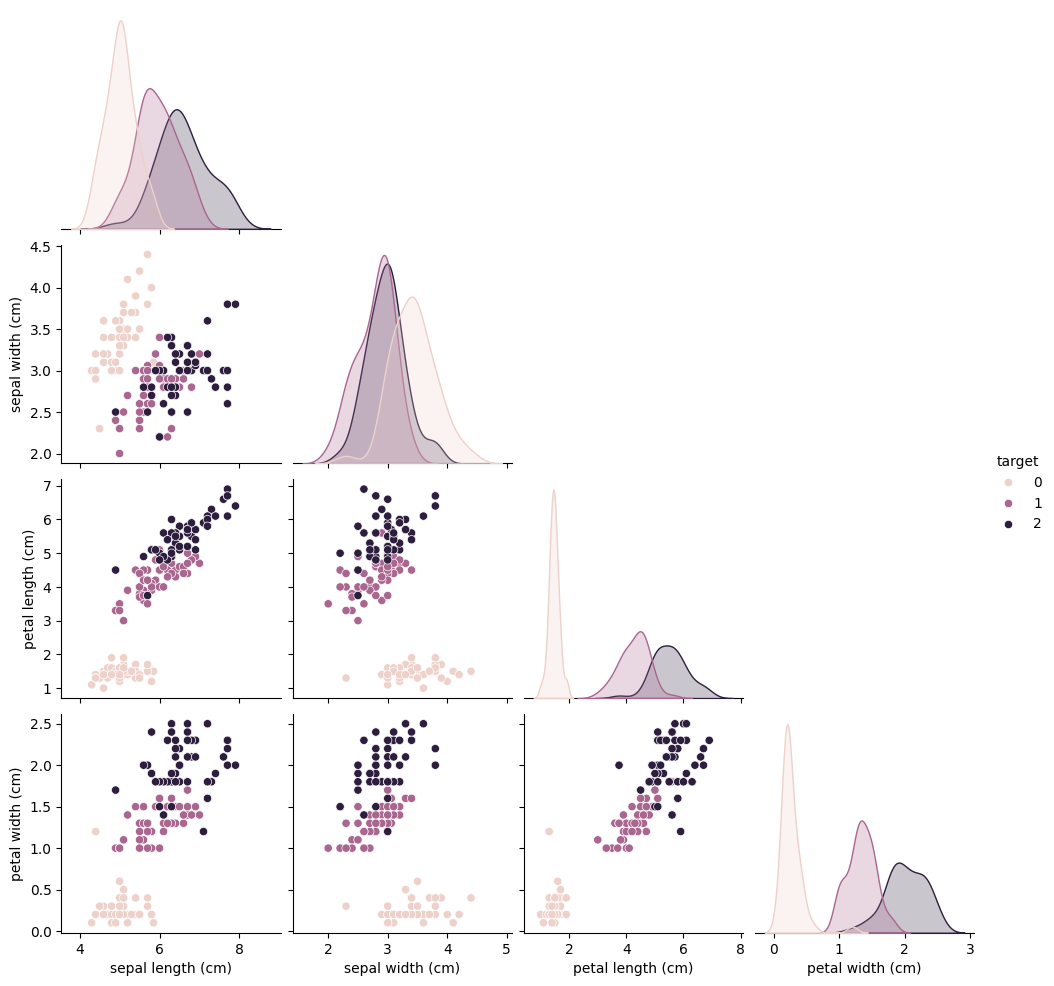

In [93]:
# Scatter plot (advanced)
sns.pairplot(df, hue='target', corner=True)
plt.show()

## Example SVC (Support Vector Classifier)

- Let's create a classifier that can predict the target class using only two attributes.
- We should choose two attributes that can be easily separated based on their class. (Check out the pairplot we made in the last step)

- There are various types of [SVC](https://scikit-learn.org/stable/modules/svm.html) and different parameters that you can use according to your needs.
- Let's see an example with four different models that use 'petal width (cm)' and 'petal length (cm)' as attributes.

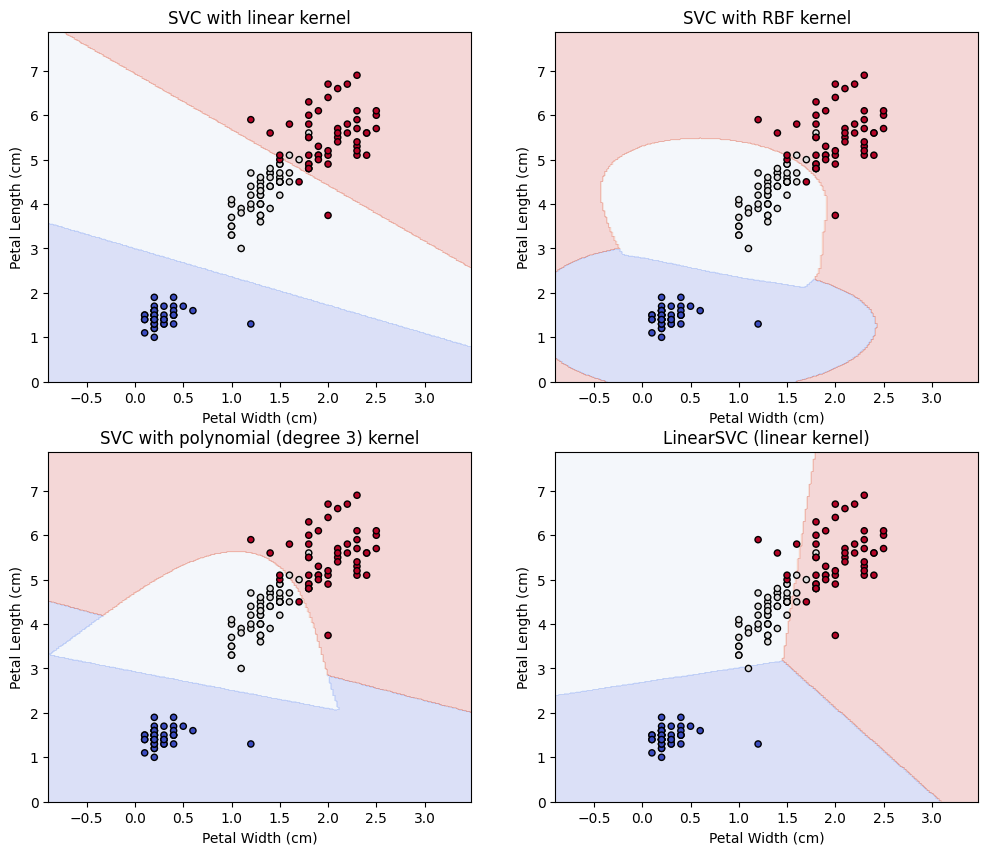

In [109]:
# Classification using Support Vector Classifier (SVC)
X = df[['petal width (cm)', 'petal length (cm)']].values
y = df['target'].values

# Create a meshgrid to plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))


C = 1.0  # SVM regularization parameter
models = (
    SVC(kernel="linear", C=C),
    SVC(kernel="rbf", gamma=0.7, C=C),
    SVC(kernel="poly", degree=3, gamma="auto", C=C),
    LinearSVC(C=C, max_iter=10000, dual="auto"),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
    "LinearSVC (linear kernel)",
)

fig, sub = plt.subplots(2, 2, figsize=(12,10))

for clf, title, ax in zip(models, titles, sub.flatten()):
    # Plot decision boundary
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

    # Scatter plot with color-coded target variable
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_title(title)
    ax.set_xlabel('Petal Width (cm)')
    ax.set_ylabel('Petal Length (cm)')

plt.show()
